In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Misc
import os


sns.set(rc={"figure.figsize": (10, 4)})

In [2]:
df = pd.read_csv(os.path.join("..", "data", "mod_sales_train.csv"))
item_info_df = pd.read_csv(os.path.join("..", "data", "items.csv"))
df.head(5)

,shop_id,item_id,date_block_num,item_price,item_cnt_day
0,25,19,0,28.0,1.0
1,2,27,0,2499.0,1.0
2,10,27,0,1890.0,1.0
3,19,27,0,2499.0,1.0
4,26,27,0,2499.0,1.0


## Question overview


### General
- Do we have missing data?
- Are there item outliers, e.g.
    - Not sold for majority of time
    - Very cheap/expensive

## General

### Do we have missing data?

<AxesSubplot:>

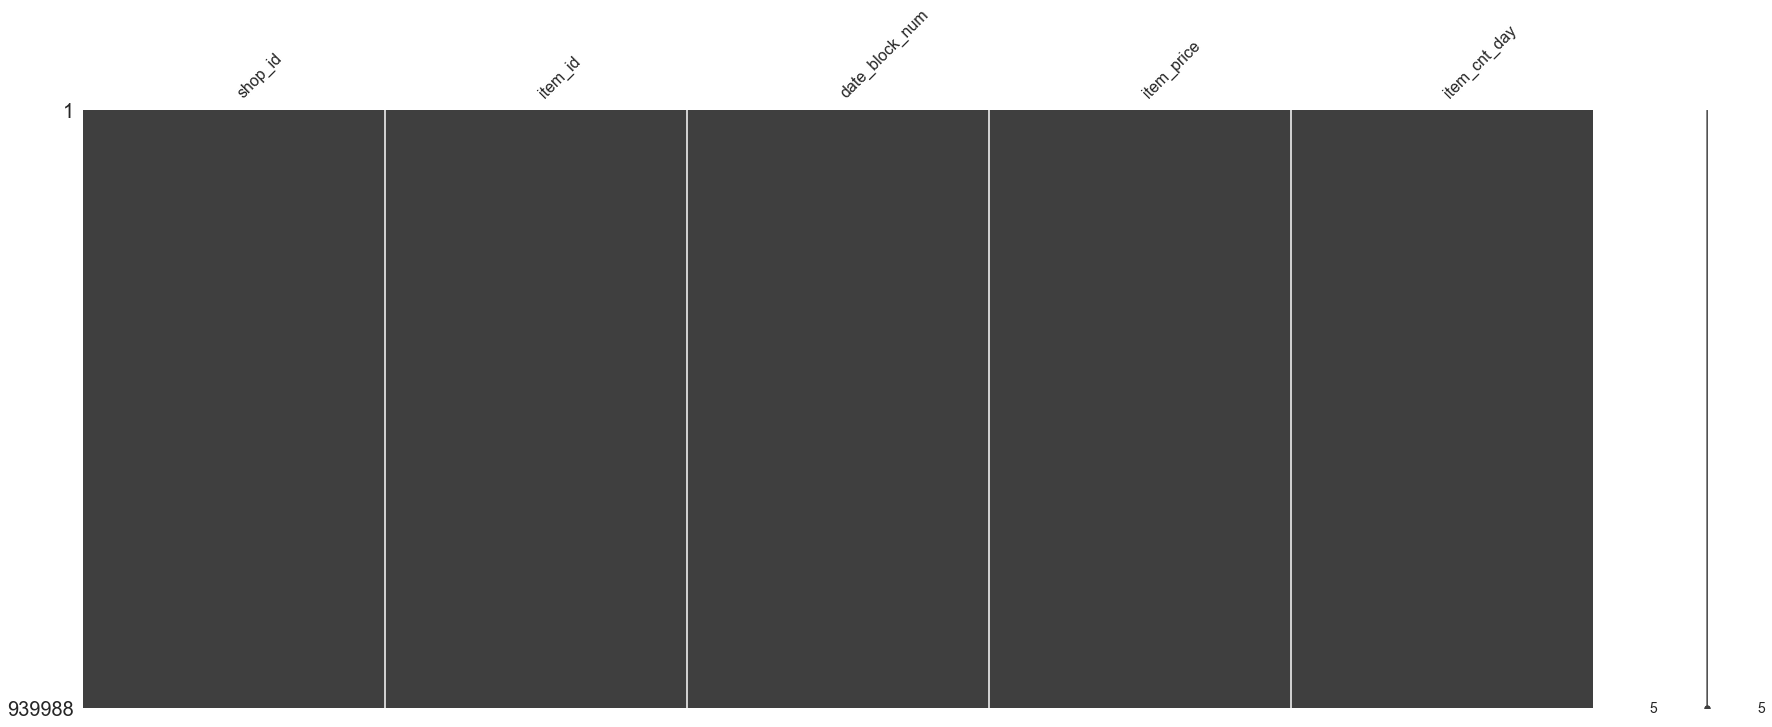

In [3]:
missingno.matrix(df.iloc[:, ], figsize=(30, 11))

Everything's there!

### Are there item outliers?

### Item prices

count    939988.000000
mean        681.223182
std        1262.546662
min           0.090000
25%         199.000000
50%         349.000000
75%         699.000000
max      307980.000000
Name: item_price, dtype: float64


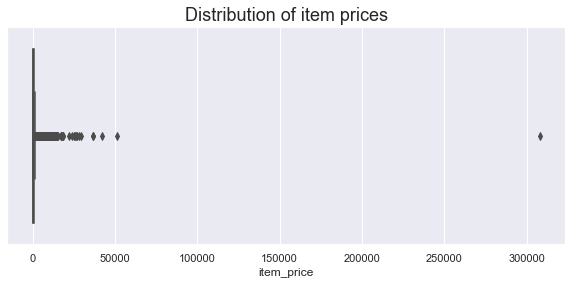

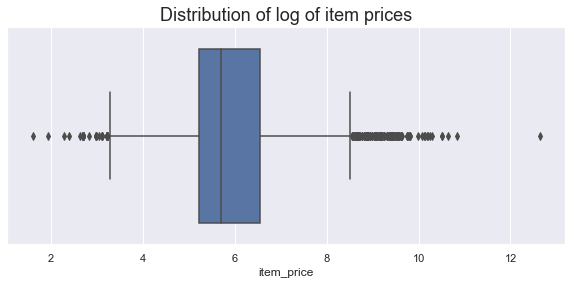

In [4]:
print(df.item_price.describe())

plt.title("Distribution of item prices", fontsize=18)
sns.boxplot(x=df.groupby("item_id").item_price.max())
plt.show()

plt.title("Distribution of log of item prices", fontsize=18)
sns.boxplot(x=df.groupby("item_id").item_price.max().apply(lambda e: np.log(e)))
plt.show()

Price-wise we can see the consequences of such a large portfolio of items (> 22.000). The prices concentrate in a range from 200 to 900 (25th to 75th quantile). However, prices of up to 50.000 are common with the maximum at 300.000. The distribution can be modelled somewhat Gaussian when we apply np.log to the prices.

In [5]:
print(f"High-priced item ID: {df[df.item_price > 300000].item_id.iloc[0]}")

High-priced item ID: 6066


In [6]:
df[df.item_id == 6066]

,shop_id,item_id,date_block_num,item_price,item_cnt_day
641261,12,6066,11,307980.0,1.0


In [7]:
print(item_info_df[item_info_df.item_id == 6066].item_name)

6066    Radmin 3  - 522 лиц.
Name: item_name, dtype: object


Since the item is only sold once we cannot check whether this is a measurement error. For the moment we'll keep this item in the dataset.

### Item sales

count    16473.000000
mean       128.870576
std        847.661940
min        -11.000000
25%          6.000000
50%         28.000000
75%         95.000000
max      97038.000000
Name: item_cnt_day, dtype: float64


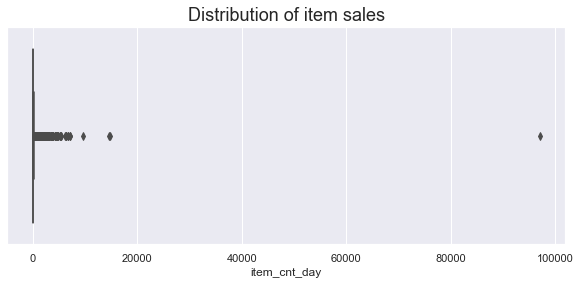

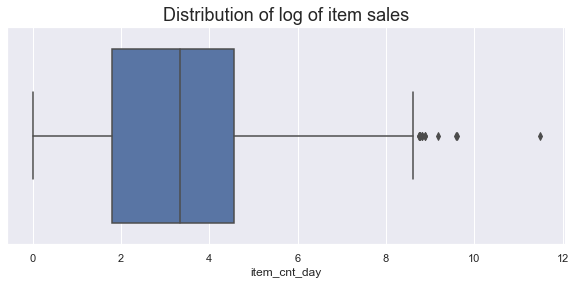

In [8]:
print(df.groupby("item_id").item_cnt_day.sum().describe())

plt.title("Distribution of item sales", fontsize=18)
sns.boxplot(x=df.groupby("item_id").item_cnt_day.sum())
plt.show()

plt.title("Distribution of log of item sales", fontsize=18)
sns.boxplot(x=df.groupby("item_id").item_cnt_day.sum().apply(lambda e: np.log(e)))
plt.show()

In [9]:
print(f"Suspicious item ID: {df.groupby('item_id').item_cnt_day.sum().sort_values().reset_index().iloc[-1, 0]}")

Suspicious item ID: 20949


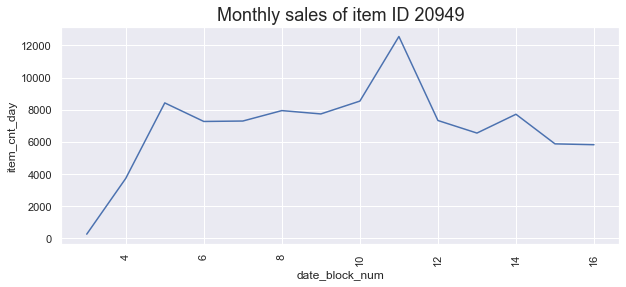

In [10]:
plot_df = (
    df[df.item_id == 20949]
    .groupby("date_block_num")
    .item_cnt_day
    .sum()
    .reset_index()
)

plt.title("Monthly sales of item ID 20949", fontsize=18)
fig = sns.lineplot(data=plot_df, x="date_block_num", y="item_cnt_day")
plt.xticks(rotation=90)
plt.show()

The item seems to be somewhat desired for christmas, otherwise it is sold on a more or less regular basis. It does not seem to be a measurement error.

## Summary

At this point I'll suspend the data exploration, as I think the main benefit when tackling this kind of problem is feature engineering. Also it's more fun. Therefore, with clean, outlier-free-ish data we can move on to the feature engineering part.